In [1]:
## In this notebook, we will solve a liner regression problem using yodf
## Here feature is number of digits in a prime number and label is amount
## of time it takes (in seconds) to declare if number is prime or not
## I wrote a simple program to find if a number N is prime (it tries to
## divide N from 2 until int(sqrt(N))) and recorded the time it took to
## declare that N not prime

## To start with, we will try to fit a straight line passing through these points
## and then we will try to fit the curves by adding higher order features.

In [2]:
import numpy as np
import yodf as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
def plot_points_with_fittted_curve(X, y, predictions=None, degree=None, cost=None):    
    axes = plt.gca()
    axes.set_xlabel('Number of digits in a prime number')
    axes.set_ylabel('Time in seconds to find it out')
    plt.scatter(X, y, marker='o', s=50, color='yellow', edgecolor='black', label='Points')
    if predictions is not None:
        plt.plot(X, predictions, color='green', label=f'Fitted curve with degree = {degree}')
        plt.title(f'Polynomial degree = {degree}, Cost = {cost:0.3f}')
    plt.legend(loc='upper center')

# X represents number of digits in the prime number
# y is amount of time in seconds to find if number is prime or not
X = np.array([ 10, 14, 15, 18, 19, 20, 21 ])
y = np.array([ 0.008, 0.417, 3.498, 109.141, 470.898, 1130.939, 5229.632 ])

print(X.shape, y.shape)

# Let us convert X and y from rank-1 matrix to rank-2 matrix
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)
print(X.shape, y.shape)

(7,) (7,)
(7, 1) (7, 1)


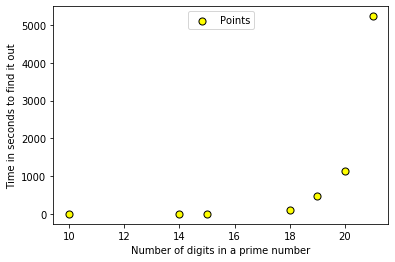

In [4]:
## Below is the scatter plot of our data

plt.figure(figsize=(6, 4))
plot_points_with_fittted_curve(X, y)
plt.show()

In [5]:
# Adds higher order features
# Expects X to be of shape (m, 1) where m is 
# number of samples
def add_features(X, degree):
    m = X.shape[0]
    ret = X
    for i in range(2, degree+1):
        ret = np.hstack((ret, np.power(X, i)))
    return ret

def normalize(X):
    n = X.shape[1]
    m = np.mean(X, axis=0).reshape((1,n))
    s = np.std(X, axis=0).reshape((1,n))
    return (X-m)/s

In [6]:
degree = 1
start_time = time.time()
learning_rate = 0.1
iterations = 1000

X_final = add_features(X, degree)
X_final = normalize(X_final)
X_final = np.hstack((np.ones((X_final.shape[0], 1)), X_final))

print(X_final)
m = X_final.shape[0]

W = tf.Variable(np.zeros([degree+1, 1]))
y_p = tf.matmul(X_final, W)

cost = 1./2.*tf.reduce_mean((y_p -y)**2)
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for i in range(iterations):
        W_final, cost_final,_ = session.run([W, cost, train])
    W_final, cost_final = session.run([W, cost])
end_time = time.time()
print(f"Time taken = {end_time-start_time:0.3f} seconds.")
print(W_final)
print(cost_final)

## Results you would get if you were to run the code with
## with 'import tensorflow as tf' instead of 'import yodf as tf'
# [[ 1.         -1.85783813]
#  [ 1.         -0.75104094]
#  [ 1.         -0.47434165]
#  [ 1.          0.35575624]
#  [ 1.          0.63245553]
#  [ 1.          0.90915483]
#  [ 1.          1.18585412]]
# Time taken = 0.366 seconds.
# [[ 992.07614286]
#  [1080.63452294]]
# 985560.0466818277

[[ 1.         -1.85783813]
 [ 1.         -0.75104094]
 [ 1.         -0.47434165]
 [ 1.          0.35575624]
 [ 1.          0.63245553]
 [ 1.          0.90915483]
 [ 1.          1.18585412]]
Time taken = 0.214 seconds.
[[ 992.07614286]
 [1080.63452294]]
985560.0466818277


In [7]:
## Code below might take about a minute to run with yodf
## With Tensorflow, tiem would be around 15 seconds

Fitting polynomial with degree: 1, Variable size: (2, 1) ...
Execution Time = 2.200 seconds.

Fitting polynomial with degree: 2, Variable size: (3, 1) ...
Execution Time = 4.073 seconds.

Fitting polynomial with degree: 3, Variable size: (4, 1) ...
Execution Time = 6.243 seconds.

Fitting polynomial with degree: 4, Variable size: (5, 1) ...
Execution Time = 8.949 seconds.

Fitting polynomial with degree: 5, Variable size: (6, 1) ...
Execution Time = 12.164 seconds.

Fitting polynomial with degree: 6, Variable size: (7, 1) ...
Execution Time = 17.085 seconds.



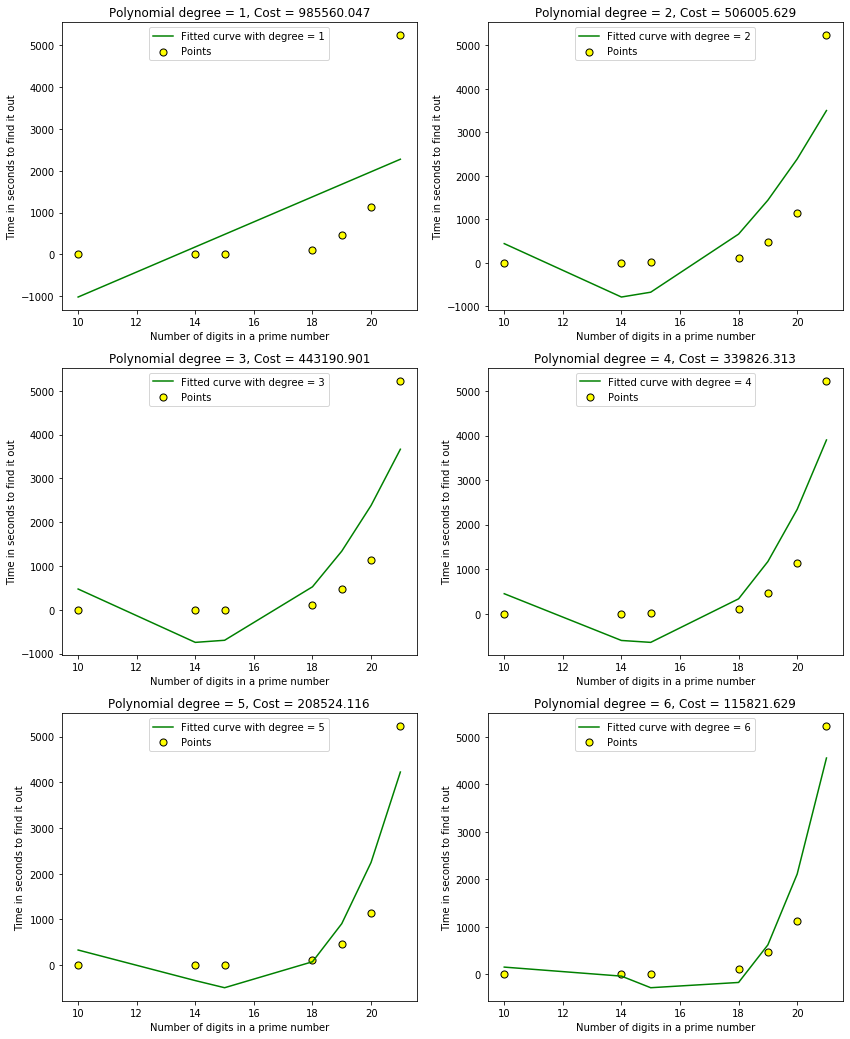

In [8]:
plt.figure(figsize=(14, 18))
plotIndex = 1
for degree in range(1, 7):
    start_time = time.time()
    learning_rate = 0.1
    iterations = 10000
    
    X_final = add_features(X, degree)
    X_final = normalize(X_final)
    X_final = np.hstack((np.ones((X_final.shape[0], 1)), X_final))
    m = X_final.shape[0]
    
    W = tf.Variable(np.zeros([degree+1, 1]))
    print(f"Fitting polynomial with degree: {degree}, Variable size: {W.shape} ...")
    
    # With tensorflow code to create placeholder is slighly different
    if tf.__name__ == 'tensorflow':
        x_p = tf.placeholder(dtype=tf.float64, shape=X_final.shape)
    elif tf.__name__ == 'yodf':
        x_p = tf.placeholder(dtype=tf.TensorType.FLOAT, shape=X_final.shape)
    else:
        error = f"Unknown tf package '{tf.__name__}'"
        raise Exception(error)
    y_p = tf.matmul(x_p, W)
    
    cost = 1./(2.*m)*tf.reduce_sum(tf.square(tf.subtract(y_p, y)))
    train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)
        for i in range(iterations):
            session.run(train, feed_dict={x_p: X_final})
        W_final, cost_final = session.run([W, cost], feed_dict={x_p: X_final})
    predictions = X_final.dot(W_final)
    plt.subplot(3 ,2, plotIndex)
    plot_points_with_fittted_curve(X, y, predictions, degree, cost_final)
    end_time = time.time()
    print(f"Execution Time = {end_time-start_time:0.3f} seconds.\n")
    plotIndex += 1